# MATH 541 Data Analysis and Statistical Learning
## Assignment 1
## Course Instructor- Dr. Rustem Takhanov
## done by Jamil Zhumabek

Input vector is defined by $p$ features $X_1, X_2, ..., X_{13}$, output is a target feature $Y$.

In [ ]:
from google.colab import files

# Downloading file from my PC
uploaded = files.upload()

Saving data9.txt to data9 (3).txt


In [ ]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Assuming 'data9.txt' is space-separated without a header
df = pd.read_csv("data9.txt", sep=" ", header=None)


In [ ]:
#naming the columns as our features and target
df.columns = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "Y"]

In [ ]:
# first look at our data
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,-33.60,-0.334,-21.300,10.70,-13.00,1.45,3.65,-8.78,8.78,3.80,9.68,1.28,10.60,12.6
1,5.48,20.500,4.130,-5.73,21.50,-11.50,-16.80,24.50,-8.25,12.50,-12.50,-8.26,-11.50,-28.9
2,6.05,-20.700,6.710,5.29,5.36,-2.96,-10.80,4.74,-11.10,-16.00,2.13,-17.50,11.60,-60.8
3,4.24,12.700,0.695,-22.90,-7.93,-3.58,7.55,-5.82,-18.90,5.06,-12.90,-12.60,-15.20,51.4
4,8.08,16.500,1.820,13.70,-18.20,14.00,11.90,-11.00,14.20,15.10,8.68,1.74,0.61,91.8


#### 1. For any feature $X_i$, estimate covariance and correlation between $X_i$ and target feature $Y$ (on a training set).

In [ ]:
#creating dataframe for our covariance and correlation with Y
cov_cor_df = pd.DataFrame(columns=["Covariance with Y", "Correlation with Y"])
# computing covariance and correlation with Y for each feature
for i in df.columns[:-1]:
  cov_cor_df.loc[i] = [df[i].cov(df["Y"]), df[i].corr(df["Y"])]

In [ ]:
cov_cor_df

,Covariance with Y,Correlation with Y
X1,-18.751839,-0.031725
X2,84.065112,0.139593
X3,-30.384102,-0.056553
X4,178.920047,0.314780
X5,-169.818454,-0.283161
X6,220.598213,0.438741
X7,223.188781,0.385805
X8,-160.294281,-0.301188
X9,192.442539,0.299153
X10,74.021014,0.136935


#### 2. For any feature $X_i$, calculate absolute value of correlation $\left| \frac{\hat{Cov} (X_i,Y)} {\hat{\sigma}_{X_i} \hat{\sigma}_{Y}}\right|$.

In [ ]:
abs_cor_df = cov_cor_df["Correlation with Y"].abs()
abs_cor_df.name = "Absolute value of correlation with Y"

In [ ]:
abs_cor_df

,Absolute value of correlation with Y
X1,0.031725
X2,0.139593
X3,0.056553
X4,0.314780
X5,0.283161
X6,0.438741
X7,0.385805
X8,0.301188
X9,0.299153
X10,0.136935


#### 3. **Question 1:** Based only on the latter correlation, can you list all variables that is relevant for prediction?


In [ ]:
for i in abs_cor_df.index:
  if abs_cor_df[i] > 0.4:
    print(i)

X6
X11
X13


Based on the latter correlation analysis, the variables $X_{6}$, $X_{11}$, and $X_{13}$ are relevant for prediction as they have an absolute correlation value greater than 0.4. These variables demonstrate a stronger relationship with the target variable and are more likely to contribute to the predictive power of the model.

But since a correlation threshold of 0.4 is generally considered moderate but not strong, we might also notice that only the variables $X_{11}$ and $X_{13}$ are relevant for prediction, since their absolute correlation value higher than 0.5.

#### 4. Calculate the correlation matrix $C = [correl(X_i, X_j )]_{1≤i,j≤13}$, where $correl(X_i, X_j )$ is an estimator of the correlation between variables $X_i$ and $X_j$.

In [ ]:
df_x = df.iloc[:, :-1]
C = df_x.corr()

In [ ]:
C

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
X1,1.000000,-0.052700,0.889841,-0.067776,-0.026765,0.048209,0.034670,-0.047111,-0.063943,-0.065050,-0.069993,-0.113381,-0.036003
X2,-0.052700,1.000000,-0.061566,0.068729,0.079698,-0.073665,-0.060785,0.080929,0.092929,0.880906,-0.126930,0.012362,-0.138716
X3,0.889841,-0.061566,1.000000,-0.091798,-0.019547,0.055259,0.045381,-0.044803,-0.089888,-0.072295,-0.044156,-0.115627,-0.020325
X4,-0.067776,0.068729,-0.091798,1.000000,-0.092904,-0.062296,-0.005986,-0.065432,0.907142,0.060991,-0.100843,-0.023663,-0.148732
X5,-0.026765,0.079698,-0.019547,-0.092904,1.000000,0.071335,0.073574,0.896229,-0.085302,0.111363,0.001765,0.103346,-0.017318
X6,0.048209,-0.073665,0.055259,-0.062296,0.071335,1.000000,0.863538,0.041090,-0.084113,-0.076203,0.074388,0.022597,0.052261
X7,0.034670,-0.060785,0.045381,-0.005986,0.073574,0.863538,1.000000,0.046933,-0.025521,-0.054799,0.091978,0.057128,0.044524
X8,-0.047111,0.080929,-0.044803,-0.065432,0.896229,0.041090,0.046933,1.000000,-0.051069,0.097544,-0.030986,0.067084,-0.055312
X9,-0.063943,0.092929,-0.089888,0.907142,-0.085302,-0.084113,-0.025521,-0.051069,1.000000,0.094838,-0.124991,-0.028290,-0.169556
X10,-0.065050,0.880906,-0.072295,0.060991,0.111363,-0.076203,-0.054799,0.097544,0.094838,1.000000,-0.109575,0.037812,-0.131092


#### 5. **Question 2:** What conclusion can you make about the structure of your predictors after analysis of correlation matrix?

In [ ]:
for i in C.columns:
    for j in C.columns:
        if C.columns.get_loc(i) < C.columns.get_loc(j):  # This ensures no repetition
            if abs(C.loc[i, j]) > 0.5:
                print(f"{i} and {j} are highly correlated")


X1 and X3 are highly correlated
X2 and X10 are highly correlated
X4 and X9 are highly correlated
X5 and X8 are highly correlated
X6 and X7 are highly correlated
X11 and X13 are highly correlated



As you might observe, there is a high correlation between 6 pairs of variables. It implies that some features may be redundant. So it can make model estimates less reliable and harder to interpret.

#### 6. Write a Python code for least square estimation of weights $β_i$ in the model (of course, using only training set): $$Y = β_0 + β_1X_1 + ... + β_pX_p + ϵ$$ You may use scikit-learn or statsmodel.api libraries. Both have functions that deal with linear regression.


In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(df["Y"], sm.add_constant(df.iloc[:, :-1]))

In [ ]:
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.318e+06
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:06:56   Log-Likelihood:                 28.443
No. Observations:                 300   AIC:                            -28.89
Df Residuals:                     286   BIC:                             22.97
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9725      0.013    748.902      0.000       9.946       9.999
X1             0.0012      0.003      0.463      0.643      -0.004       0.006
X2            -0.0007      0.002     -0.283      0.777      -0.006       0.004
X3            -0.5026      0.003   -174.232      0.000      -0.508      -0.497
X4             0.9959      0.003    336.902      0.000       0.990       1.002
X5             0.0002      0.003      0.071      0.944      -0.005       0.005
X6             2.9979      0.003   1066.509      0.000       2.992       3.003
X7             0.0020      0.002      0.830      0.408      -0.003       0.007
X8            -1.9987      0.003   -663.026      0.000      -2.005      -1.993
X9             0.0016      0.003      0.596      0.552      -0.004       0.007
X10            0.5005      0.003    180.097      0.000       0.495       0.506
X11           -0.0008      0.003     -0.279      0.780      -0.006       0.005
X12            0.0007      0.001      0.487      0.627      -0.002       0.003
X13           -3.9997      0.003  -1365.359      0.000      -4.005      -3.994
==============================================================================
Omnibus:                       15.693   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.374
Skew:                           0.219   Prob(JB):                       0.0152
Kurtosis:                       2.309   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 7. Let us denote $b_i$ a least square estimate of $β_i$. Obtain values of $b_i$, $i = \bar{0, p}$

In [ ]:
b = model.params
print(b)

const    9.972547
X1       0.001214
X2      -0.000703
X3      -0.502636
X4       0.995900
X5       0.000190
X6       2.997887
X7       0.002031
X8      -1.998669
X9       0.001564
X10      0.500521
X11     -0.000756
X12      0.000670
X13     -3.999671
dtype: float64


#### 8. Estimate variance $\hat{σ}^2$ of noise $ϵ$ (on a training set) as MSE.

In [ ]:
sigma2 = model.mse_resid
print(sigma2)

0.05080782221639362


#### 9. Let us denote $t_i$ the t-value for a variable $X_i$, i.e. $t_i = \frac{b_i} {\hat{σ} \sqrt{h_{ii}}}$ where $[h_{ij} ] = (X^TX)^{−1}$. Calculate t-value (on a training set) of every non-target variable.

In [ ]:
t = b / np.sqrt(model.mse_resid * np.diag(model.normalized_cov_params))
print(t)

const     748.901646
X1          0.463332
X2         -0.283369
X3       -174.232022
X4        336.901551
X5          0.070506
X6       1066.509473
X7          0.829520
X8       -663.025778
X9          0.595658
X10       180.096571
X11        -0.279212
X12         0.486777
X13     -1365.359235
dtype: float64


#### 10. Based on the value of $t_i$ find all your variables that is relevant for prediction.

In [ ]:
relevant_variables = df.columns[:-1][np.abs(t[1:]) > 2]
print(relevant_variables)

Index(['X3', 'X4', 'X6', 'X8', 'X10', 'X13'], dtype='object')


#### 11. **Question 3:** List variables that can be discarded

In [ ]:
irrelevant_variables = df.columns[:-1][np.abs(t[1:]) <= 2]
print(irrelevant_variables)

Index(['X1', 'X2', 'X5', 'X7', 'X9', 'X11', 'X12'], dtype='object')



We see that **$X_1$, $X_2$, $X_5$, $X_7$, $X_9$, $X_{11}$, $X_{12}$** variables have a $|t|$-value less than or equal to 2, what indicates that they are less significant and can be excluded
from the model in order to improve its efficiency and focus on the more relevant predictors.

#### 12. Calculate residuals and draw Q-Q plot.

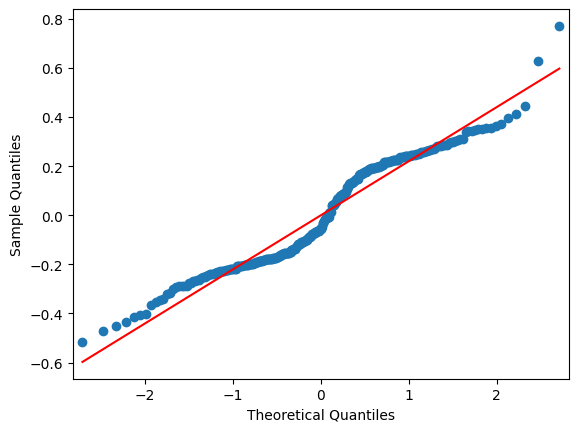

In [ ]:
qqp = sm.qqplot(model.resid, line="s")

### 13. **Question 4:** Is an error normally distributed, yes or no (based on Q-Q plot)?

 The Q-Q plot shows that the errors are approximately normally distributed, since most of the points align closely with the straight line. In the same time, you might observe the deviations at the tails, what means that the distribution might not be perfectly normal, particularly in the extremes.

#### 14. Draw a plot “residuals against $\hat{Y}$ ”.

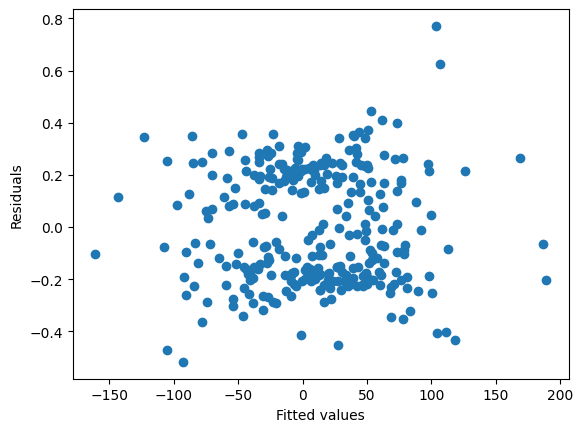

In [ ]:
residuals = model.resid
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

#### 15. **Question 5:** If your error is not normal, what would you assume about the real distribution of an error (based on the latter plot)?
We already know, based on the **Q-Q** plot that the errors are approximately normally distributed.
Recall that for a well-fitted linear regression model the residuals should be randomly scattered around the horizontal axis (zero) on the **Residuals vs Fitted Values** plot without any noticeable patterns.

 So, we might observe that the residuals appear scattered around the zero line with no strong patterns, but its spread is not uniform, which indicates heteroscedasticity or unequal variance. That in turn can explain deviations at the tails on **Q-Q** plot.




#### 16. Calculate $R^2$

In [ ]:
r2 = model.rsquared
print(r2)

0.9999833032521728


### 17. **Question 6:** Give the final verdict: did linear regression model solved the prediction problem or not?

The very high $R^2$ of 0.9999 value indicates that the linear regression model fits the data extremely well what explains nearly all the variance. Moreover, the residuals appear to be normally distributed, supporting the assumption that the model is well-defined for this problem.But, probably we should conduct testing for overfitting.

